# Monte Carlo Simulation

Monte Carlo Simulations (MC-Simulations) rely on repeated random sampling to obtain numerical results. While they have interesting physical and mathematical applications, e.g. finite integrals, they also allow to simulate uncertainties in input. This is very useful when it comes to analysing

- Quality Management problems,
- Design robustness or
- System risk.

To implement MC-Simulations, we need computational power as well as well proven random number generators, this is where numpy comes in handy. 

We start with the imports.

In [1]:
# Numpy for higher level mathematics
import numpy as np
# Matplotlib and the pyplot module for a Matlab-like plot syntax
import matplotlib
# This is the syntax to import as a named module
import matplotlib.pyplot as plt
# Plot the graphs in the notebook
%matplotlib inline

The random number generators are contained in the ```np.random``` library, let's inspect some! To do this (and use the newly implemented PCG-64 random generator), we need to istante the random number generator first.

In [2]:
# Random number generator
rng = np.random.default_rng()

### Continuous distributions

The most frequently used distributions include:

- Uniform distribution
- Normal distribution
- Gamma distribution -> Positive distribution
- Exponential distribution -> Positive distribution

In [3]:
# Shape of the generated arrays
sh = (10000,1)
# Uniform distribution between low and high
U = rng.uniform(low = 0, high = 1, size = sh)
# Normal distribution with loc mean and scale standard deviation
N = rng.normal(loc = 0, scale = 1, size = sh)
# Gamma distribution with shape and scale
G = rng.gamma(shape = 5, scale = 1, size = sh)
# Exponential distribution with scale
E = rng.exponential(scale = 1, size = sh)

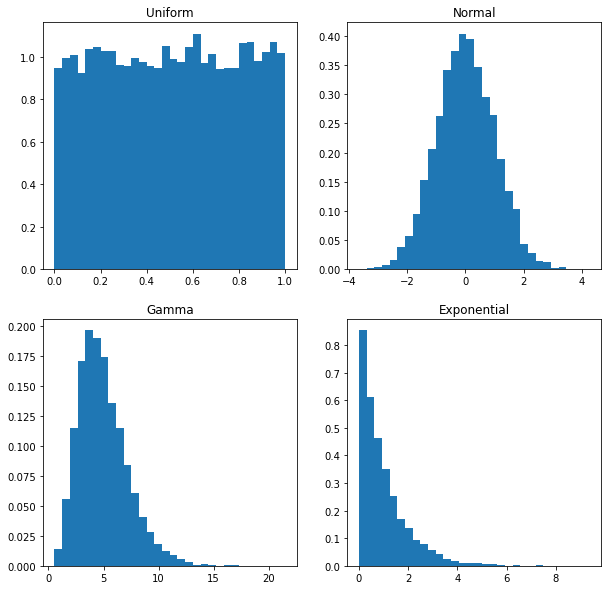

In [4]:
# Plotting of the distributions, nbins bins per histogram, 2x2 subplots.
nbins = 30
plt.figure(figsize = (10,10))
plt.subplot(221, title = 'Uniform')
plt.hist(U, density = True, bins = nbins)
plt.subplot(222, title = 'Normal')
plt.hist(N, density = True, bins = nbins)
plt.subplot(223, title = 'Gamma')
plt.hist(G, density = True, bins = nbins)
plt.subplot(224, title = 'Exponential')
trash = plt.hist(E, density = True, bins = nbins)

### Discrete distributions

Notable discrete distributions include

- Random Integers
- Binomial
- Poisson

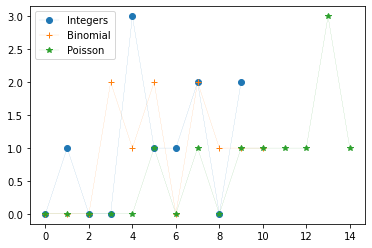

In [5]:
# Random integers
I = rng.integers(low = 0, high = 10, size = 10)
# Binomially distribution
B = rng.binomial(n = 100, p = 0.05, size = 10)
# Poisson distribution
P = rng.poisson(lam = 10, size = 10)
# Explicit bincounting since histogram is not sensible
Ic = np.bincount(I)
Bc = np.bincount(B)
Pc = np.bincount(P)
# Plotting - connections to find markers better...
plt.plot(Ic, marker = 'o', linewidth = 0.1, label = 'Integers')
plt.plot(Bc, marker = '+', linewidth = 0.1, label = 'Binomial')
plt.plot(Pc, marker = '*', linewidth = 0.1, label = 'Poisson')
trash = plt.legend()

### Choice and permutation

Using choice, it is possible to randomly select instances from an array.
Permutation returns a randomly reordered version of that array.

In [6]:
# Array to chose and permutate from
a = np.linspace(1,10,10)
print('Original array: ' + str(a))
# Choice
print('Choice (3/10):  ' + str(rng.choice(a,3)))
# Permutation
print('Permutation:    ' + str(rng.permutation(a)))

Original array: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
Choice (3/10):  [1. 3. 1.]
Permutation:    [ 9. 10.  2.  4.  5.  3.  8.  6.  1.  7.]


## Example MC-Simulation

As outlined above, the central ideal in MC-Simulation is to repeat random processes sufficiently often to evaluate their random properties. 

One (simple) example where randomness comes into play is the fitting of hole and shaft in an engineering fit problem.



The process of simulating this in MC terms follows these steps:

1. Model the desired property as a function $f(x_1, x_2,...,x_n)$
1. Find suitable distributions for the $x_i$
1. Simulate to obtain $f$ and its probability distribution

Assume we have a H7/k6 interference fit of nominal $20\,\mathrm{mm}$ diameter, which means

- the hole is $h = 20^{+0.021}_{-0}\,\mathrm{mm}$ in diameter
- the shaft is $s = 20^{+0.015}_{+0.002}\,\mathrm{mm}$ in diameter

The function to determine the level of deformation required is $f(h,s) = h-s$, yielding negative values for clearance and positive values for interference.

In the MC-Simulation, we can manufacture $N = 1000$ of these fitting virtually. Let's assume a nominal behaviour of the parts:

Quorum of interference > 0.01 mm: 0.0467


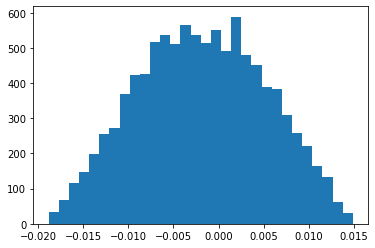

In [7]:
N = 10000
h = rng.uniform(low = 20, high = 20.021, size = N)
s = rng.uniform(low = 20.002, high = 20.015, size = N)
f = s-h
plt.hist(f, bins = 30)
print('Quorum of interference > 0.01 mm: ' + str(len(f[f>0.01])/N))

The triangular distribution as the result can be calculated analytically, however what happens if one of the distribution tends to the larger side, e.g. following a gamma distribution? 

Quorum of clearance > 0.01 mm: 0.5343


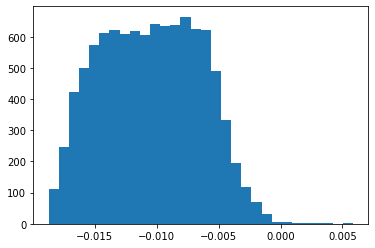

In [8]:
h2 = 20.021-0.001*rng.gamma(2, size=N)
f2 = s-h2
plt.hist(f2, bins = 30)
print('Quorum of clearance > 0.01 mm: ' + str(len(f2[f2<-0.01])/N))

We clearly see that there is more interference fit and almost no clearance. One of the difficulties to use MC-Simulations is that in engineering, we frequently encounter limited intervals while the distributions employed to obtain the solutions mostly have an infinite support, i.e. there are non-zero propabilities assigned to values between $-\infty$ and $\infty.$ A potential work-around is either to limit the resulting distributions by filtering or to accept these extreme values at low probability.

## Exercise

Simulate hole and shaft of nominal $d = 50\,\mathrm{mm}$ in a H7/u6 fitting.

H7: $0/+0.03\,\mathrm{mm}$
u6: $+0.087/+0.106\,\mathrm{mm}$

Inspect both distributions assuming uniform distribution and simulate the assembly.

- How likely is it to have more than $0.1\,\mathrm{mm}$ of interference?
- Assume the shaft manufacturing is somewhat skewed and the shaft follows a tolerance of $$(50.087+0.001 F(2))\,\mathrm{mm},$$
where $F(2)$ is exponentially distributed with shape parameter $\lambda = 2$. How likely is it now to have more than $0.1\,\mathrm{mm}$ of interference?

# MC-Simulating the manufacturing process of spring packages

In this example, we investigate the behaviour of spring packages, as e.g. used in spring parking brakes. They consist of a high number of individual springs, in the example under consideration we have 24 springs in total in 8 colinear packages.

The requirement for such spring packages is to have the overall spring ratio within a certain range, however the individual springs vary considerable, with 20% variation being rather frequent.

In the simulation, we assume that $c\in \left[3450, 3750 \right]\mathrm{kN}$ leads functional spring packages.

Simulate $N$ sets of springs, 3x8 each.

In [9]:
# Fix random generator for repeatability
rng = np.random.default_rng(42)
# Number of simulations - Nx8 to obtain iid realisations
N = int(1e6)
S = (N,8)
c1 = rng.uniform(low = 90, high = 110, size = S)
c2 = rng.uniform(low = 135, high = 165, size = S)
c3 = rng.uniform(low = 180, high = 220, size = S)

Assemble spring packages, the overall spring ratio is the sum of the individual spring ratios.

In [10]:
c = np.sum(c1, axis = 1)+np.sum(c2, axis = 1)+np.sum(c3, axis = 1)

Analyse distribution by plotting the histogram.

Text(0.5, 0, '$c$/(kN/m)')

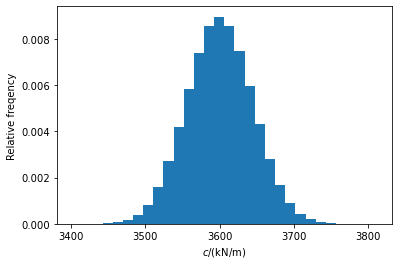

In [11]:
nbins = 30
plt.hist(c, density = True, bins = nbins)
plt.ylabel('Relative freqency')
plt.xlabel('$c$/(kN/m)')

## Determine distribution probabilities

It is clearly to be seen that the resulting distribution is more narrow than the $\pm20\%$ of the individual springs, and resembles a normal distribution due to the central limit theorem.

In [12]:
print('Mean value:          ' + str(np.round(np.mean(c))))
print('Standard dev.:       ' + str(np.round(np.std(c))))
print('99% of realisations: ' + str(np.round(np.mean(c) - 3*np.std(c))) 
      +' ... '+ str(np.round(np.mean(c) + 3*np.std(c))))

Mean value:          3600.0
Standard dev.:       44.0
99% of realisations: 3468.0 ... 3732.0


This indicates that 99% of the realisations are within 3468 and 3732 kN/m, assuming a normal distribution.

## Exercise

Repeat the spring package example, but assume the supplier of spring 3 delivers springs on the lower end of the tolerance range, uniformly distributed between $180\frac{\mathrm{kN}}{\mathrm{m}}$ and $190\frac{\mathrm{kN}}{\mathrm{m}}$. 
- How does the overall distribution vary? Analyse mean and as well as standard deviation. 
- How many realisations are below the minimum tolerance level?

## Exercise

The brake system of a rail vehicle applies the brake using a pneumatic cylinder with $p_c \in \left[3.7, 3.9 \right]\, \mathrm{bar}$, with a filling time $t_f = (4\pm1)\,\mathrm{s}$. This cylinder force is then transferred via a brake rigging with efficiency $\eta \in \left[0.81, 0.9 \right]$ and transmission ratio $U=1.4$ to the brake blocks with $\mu = 0.35\pm0.05$ (normally distributed with 95% confidence).

The vehicle has a total mass $m = 90\mathrm{t}$ including rotating masses and eight of the brakes as described above are installed. 

To run a MC-Simulation of the braking distances, proceed as follows:

1. Define the variables to be picked from appropriate distributions
1. Select $N$, the number of repeated MC-Experiments
1. Determine the braking force per wheel according to 
$$F_b = U \frac{\pi}{4} (0.254 \mathrm{m})^2\eta p (10^5) \mu$$
1. Determine the retardation of the vehicle according to
$$a = \frac{\Sigma_{i=1}^8 F_{b,i}}{m}$$
1. Calculate the braking distance from $v_0 = 33.3\frac{\mathrm{m}}{\mathrm{s}} $ according to
$$s_b = v_0 t_f + \frac{v_0^2}{2a}$$

Attention: the filling time is identical for all brake units in the vehicle, whereas the other parameters vary between individual brake stations.

The resulting figure looks similar to the one below:
![Braking distance](figures/BrakingDistance.png)